<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/python_graphtheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

python で graph theory のグラフをどう描くか、試行錯誤。 実験

参考
1. sagemath での描き方 sage: g=graphs.GrotzschGraph()
1. networkx
1. matplotlib
1. PyGraphviz
1. https://qiita.com/kzm4269/items/081ff2fdb8a6b0a6112f <=qiita

1. https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
1. https://www.python-course.eu/networkx.php
1. https://igraph.org/python/doc/tutorial/tutorial.html igraph tutorial
1. plotly, pypi



python で描くということの他に、colab (jupyter) の環境での問題があるみたい。

display() しただけでは描けない。 svg にすると描ける。 これは将来変わるかもしれない。

networkx の仕様が、G.add_cycle(data_array) とかから nx.add_cycle(G, data_array) という風に変わったみたいで、いろんな記事の例がそのままでは動かない

pygraphviz の方がきれいに描けるみたいだが、import に手間がかかるのでとりあえず使わない。

In [5]:
import networkx as nx
nx.__version__

'2.5'

In [ ]:
# pygraphviz を使いたい場合次のようにすれば colab (jupyter) で描ける
# !apt install libgraphviz-dev
# !pip install pygraphviz
#
# としておいて別のコードセルで
#
# import pygraphviz
# import networkx as nx
# from IPython.display import Image
# G = nx.DiGraph()
# data_array = [1,2,3,4,5,6,7,8]
# nx.add_cycle(G, data_array)
# Image(nx.nx_agraph.view_pygraphviz(G, prog='fdp')[0])
#
# nx.nx_agraph.view_pygraphviz(G, prog='fdp') の結果が (png, object) のタプルなので [0] で png を取り出している
# png の表示方法に IPython.display のt Image を使ったがもっと一般的な方法があるかもしれない

# 有向グラフ DiGraph

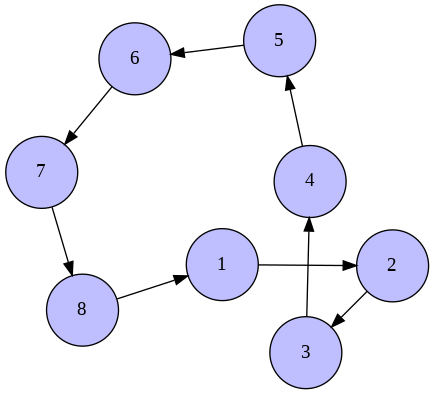

In [47]:
import networkx as nx
from IPython.display import Image
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
data_array = [1,2,3,4,5,6,7,8]

# 指定した閉路上の頂点と辺を追加
nx.add_cycle(G, data_array)

# svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
# display(svg)



In [39]:
nx.nx_agraph.view_pygraphviz?

In [7]:
import networkx as nx

G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# 頂点の追加
G.add_node(1)                
G.add_nodes_from([3, 4, 5])

# 辺の追加 (頂点も必要に応じて追加されます)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)])

# 辺の削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])

# 頂点の削除 (削除された頂点に接続されている辺も削除されます)
G.remove_node(5)
G.remove_nodes_from([3, 4])

# 指定したパス上の頂点と辺を追加
nx.add_path(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5

# 指定した閉路上の頂点と辺を追加
nx.add_cycle(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1

# 放射状に頂点と辺を追加
nx.add_star(G, [1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5

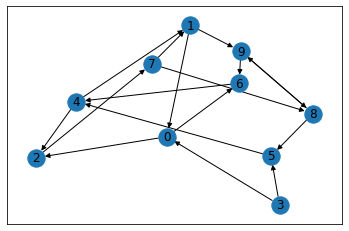

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.draw_networkx(G)
plt.show()

In [23]:
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.nx_agraph.view_pygraphviz(G, prog='fdp')  # pygraphvizが必要
display(nx.nx_agraph.view_pygraphviz(G, prog='fdp')) # 表示されない

('/tmp/tmpiqaho7yc.png',
 <AGraph <Swig Object of type 'Agraph_t *' at 0x7f51bf0ceea0>>)

In [29]:
nx.nx_agraph.to_agraph(G).draw(prog='fdp')

b'strict digraph "" {\n\tgraph [bb="0,0,275,230"];\n\tnode [label="\\N"];\n\t3\t [height=0.5,\n\t\tpos="62.161,212.05",\n\t\twidth=0.75];\n\t5\t [height=0.5,\n\t\tpos="171.7,209.96",\n\t\twidth=0.75];\n\t3 -> 5\t [pos="e,144.56,210.48 89.239,211.53 102.8,211.27 119.44,210.96 134.2,210.67"];\n\t0\t [height=0.5,\n\t\tpos="27.373,105.41",\n\t\twidth=0.75];\n\t3 -> 0\t [pos="e,33.126,123.05 56.417,194.44 50.928,177.62 42.575,152.01 36.233,132.57"];\n\t4\t [height=0.5,\n\t\tpos="153.61,108.42",\n\t\twidth=0.75];\n\t5 -> 4\t [pos="e,156.81,126.41 168.47,191.8 165.74,176.5 161.79,154.33 158.65,136.7"];\n\t2\t [height=0.5,\n\t\tpos="71.99,165.51",\n\t\twidth=0.75];\n\t0 -> 2\t [pos="e,59.813,149.11 39.565,121.83 43.893,127.66 48.866,134.36 53.596,140.73"];\n\t6\t [height=0.5,\n\t\tpos="97.152,18.247",\n\t\twidth=0.75];\n\t0 -> 6\t [pos="e,84.435,34.133 40.172,89.426 50.795,76.156 66.06,57.087 78.116,42.026"];\n\t1\t [height=0.5,\n\t\tpos="109.3,64.253",\n\t\twidth=0.75];\n\t4 -> 1\t [pos="e,12

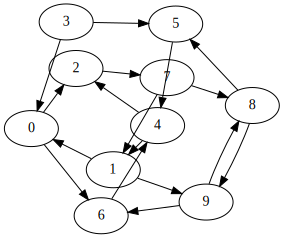

In [19]:
import networkx as nx
from IPython.display import SVG, display

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# G.nodes[頂点][属性キー] = 属性値
G.nodes[1]['a'] = 'Alice'

# G.edges[辺][属性キー] = 属性値
G.edges[1, 2]['b'] = 'Bob'

# G.succ[始点][終点][属性キー] = 属性値
G.succ[2][3]['c'] = 'Carol'

# G.pred[終点][始点][属性キー] = 属性値
G.pred[3][1]['d'] = 'Dave'

print(dict(G.nodes))
# {1: {'a': 'Alice'}, 2: {}, 3: {}}

print(dict(G.edges))
# {(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}

print(G.succ)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

print(G.pred)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

{1: {'a': 'Alice'}, 2: {}, 3: {}}
{(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
{1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
{1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}
